In [1]:
import pandas as pd
from population import live_data
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
from requests import get
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [2]:
res = requests.get("https://www.worldometers.info/coronavirus")

soup = BeautifulSoup(res.text,'html.parser')

div= soup.find_all('div',class_='main_table_countries_div') 
table = div[0].find('table',id='main_table_countries_today')

#table = div[2].find('table',id='main_table_countries_yesterday2')


table = re.sub(' class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;"',"",str(table))

#table = re.sub(' class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday2" style="width:100%;margin-top: 0px !important;display:none;"',"",str(table))

## Extract Live Data

In [3]:
df = pd.read_html(str(table))
df = df[0][:]

In [4]:
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,NaN,World,12917933,"+84,428",568987.0,"+1,952",7519031.0,"+45,092",4829915.0,58853.0,1657.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,USA,3377924,"+22,278",137572.0,+169,1491344.0,+898,1749008.0,15819.0,10203.0,416.0,41915782.0,126611.0,3.310605e+08,98.0,2406.0,8.0
2,2.0,Brazil,1842127,"+1,315",71515.0,+23,1213512.0,NaN,557100.0,8318.0,8665.0,336.0,4572796.0,21509.0,2.126035e+08,115.0,2973.0,46.0
3,3.0,India,867225,"+16,867",22983.0,+296,546379.0,"+10,148",297863.0,8944.0,628.0,17.0,11587153.0,8394.0,1.380382e+09,1592.0,60061.0,119.0
4,4.0,Russia,727162,"+6,615",11335.0,+130,501061.0,"+3,615",214766.0,2300.0,4983.0,78.0,23031056.0,157816.0,1.459365e+08,201.0,12875.0,6.0


In [158]:
df.to_csv("28062020.csv")

In [159]:
df.NewCases.unique()

array(['+100,925', '+21,581', '+6,835', '+6,632', '+22,755', nan, '+624',
       '+6,740', '+235', '+2,449', '+3,387', '+4,128', '+250', '+3,288',
       '+120', '+530', '+273', '+1,447', '+111', '+2,334', '+716', '+631',
       '+914', '+1,644', '+1,177', '+185', '+413', '+1,494', '+1,290',
       '+1,036', '+314', '+348', '+97', '+416', '+580', '+11', '+996',
       '+534', '+115', '+227', '+325', '+430', '+232', '+146', '+63',
       '+53', '+215', '+5', '+10', '+107', '+389', '+240', '+68', '+108',
       '+6', '+327', '+145', '+129', '+29', '+2', '+265', '+25', '+86',
       '+67', '+216', '+8', '+3', '+9', '+1', '+30', '+45', '+16', '+36',
       '+57', '+7'], dtype=object)

In [160]:
df.NewDeaths.unique()

array(['+2,509', '+95', '+155', '+168', '+610', nan, '+67', '+654', '+21',
       '+148', '+68', '+56', '+1', '+29', '+5', '+2', '+16', '+6', '+53',
       '+106', '+3', '+15', '+10', '+7', '+49', '+11', '+23', '+8', '+14',
       '+9', '+4'], dtype=object)

## Fill Null Values

In [161]:
df["NewCases"].fillna("0",inplace=True)
df["NewDeaths"].fillna("0",inplace=True)

### Data Correction
* Replace all Null Values with 0
* Remove comma seperators and + symbol from New Cases Column.
* Convert the column to an integer

In [162]:
def replace_val(x):
    x = re.sub("[+,.]","",x)
    #print(x)
    return x
    
df.NewCases = df.NewCases.apply(lambda x: replace_val(x)).astype(int)
df.TotalCases -= df.NewCases

df.NewDeaths = df.NewDeaths.apply(lambda x: replace_val(x)).astype(float)
#df.NewDeaths = df.NewDeaths.astype(float)

df.TotalDeaths -= df.NewDeaths

In [163]:
df.fillna(0,inplace=True)

In [164]:
df.drop(["NewCases","NewDeaths"],axis=1,inplace=True)

In [165]:
df.to_excel("forexcel_training.xlsx",index=False)

## Correlation

#### Merge Additional Data Sets

In [166]:
#median = pd.read_csv("median_age.csv")

In [167]:
#df = pd.merge(df,median,how="left",on="Country,Other")

In [168]:
#df.head()

In [169]:
#df[df["Median Age"].isnull()]
#df["Median Age"].fillna(0,inplace=True)

In [170]:
import seaborn as sns

In [171]:
# Removed China and All Countries who Test Cases are Zero
#dfcor = df[["TC","TD","TotalRecovered","ActiveCases","Serious,Critical","TotalTests","Population","Median Age"]][(df["Country,Other"] != 'China') & (df.TotalTests != 0) & (df["Median Age"] != 0)]
dfcor = df[["TotalCases","TotalDeaths","TotalRecovered","ActiveCases","Serious,Critical","TotalTests","Population"]][(df["Country,Other"] != 'China') & (df.TotalTests != 0)]

In [172]:
rename = {"TotalCases":"Cases",
         "TotalDeaths":"Deaths",
         "TotalRecovered":"Recovered",
         "Serious,Critical":"Critical",
         "TotalTests":"Tests",
         "Median Age":"MedianAge"}
dfcor.rename(columns=rename,inplace=True)

In [173]:
dfcor.corr(method="pearson")

,Cases,Deaths,Recovered,ActiveCases,Critical,Tests,Population
Cases,1.000000,0.932144,0.967595,0.967387,0.941374,0.864776,0.436905
Deaths,0.932144,1.000000,0.861334,0.886601,0.835957,0.821517,0.354581
Recovered,0.967595,0.861334,1.000000,0.900570,0.930744,0.795724,0.473289
ActiveCases,0.967387,0.886601,0.900570,1.000000,0.915087,0.850239,0.388814
Critical,0.941374,0.835957,0.930744,0.915087,1.000000,0.791791,0.624210
Tests,0.864776,0.821517,0.795724,0.850239,0.791791,1.000000,0.422645
Population,0.436905,0.354581,0.473289,0.388814,0.624210,0.422645,1.000000


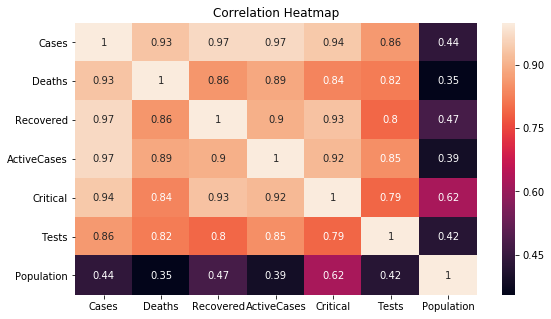

In [174]:
plt.figure(figsize=(9,5)) 
ax = sns.heatmap(dfcor.corr(method="pearson"),annot=True)
ax.set_title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")

## Import Saved Data

In [175]:
xls = pd.ExcelFile('covid19_daily_data.xlsx')

cases = pd.read_excel(xls, 'cases')
deaths = pd.read_excel(xls, 'deaths')

In [176]:
from datetime import datetime,timedelta

today = datetime.now() - timedelta(days=1)
today = today.strftime("%d-%m-%Y")

## Check if Data Exists
If data exists, the Jupyter script should stop

In [177]:
df.rename(columns={"TotalCases":"TC",
                  "TotalDeaths":"TD"},inplace=True)

In [178]:
def proportion(active,population):
    try:
        return round(active/population,6)
    except:
        return 0

In [179]:
above_1m = df[(df.Population > 2000000)&(df.ActiveCases > 1)]

In [180]:
above_1m["Proportion"] = above_1m.apply(lambda x: proportion(x.ActiveCases,x.Population),axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
la = above_1m[["Country,Other","Proportion"]].sort_values(by="Proportion").head(10)
wa = above_1m[["Country,Other","Proportion"]].sort_values(by="Proportion",ascending=False).head(10)

In [182]:
la.Proportion = la.Proportion.apply(lambda x: round(x*10000,3))
wa.Proportion = wa.Proportion.apply(lambda x: x*100)

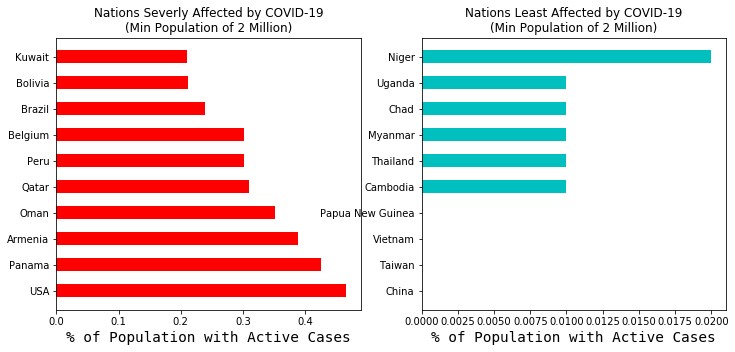

In [183]:
plt.figure(figsize=(12,5)) 
# plt.suptitle("""Top 10 Nations that Severly Affected by COVID-19
# Data as of 30th May 2020""")

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.barh(wa["Country,Other"],wa["Proportion"],
           label="Population (in millions)",
          height = .5,
          color="r")

ax1.set_title("""Nations Severly Affected by COVID-19
(Min Population of 2 Million)""")

ax1.set_xlabel('% of Population with Active Cases', color="black",
               fontsize="x-large",fontfamily="monospace")

ax2.barh(la["Country,Other"],la["Proportion"],
           label="Population (in millions)",
          height = .5,
          color="c")

ax2.set_title("""Nations Least Affected by COVID-19
(Min Population of 2 Million)""")

ax2.set_xlabel('% of Population with Active Cases', color="black",
               fontsize="x-large",fontfamily="monospace")

plt.savefig("least_severe_nations.png")

## Cases

In [184]:
cases = pd.merge(cases,df[["Country,Other","TC"]],how="left",on="Country,Other")

find_col = [col for col in cases.columns if today in col]

if find_col != []:
    cases[today] += cases["TC"] - cases["TotalCases"]
else:
    cases[today] = cases["TC"] - cases["TotalCases"]

cases.drop("TotalCases",axis=1,inplace=True)
#cases.head()

## Deaths

In [185]:
deaths = pd.merge(deaths,df[["Country,Other","TD"]],how="left",on="Country,Other")

find_col = [col for col in deaths.columns if today in col]

if find_col != []:
    deaths[today] += deaths["TD"] - deaths["TotalDeaths"]
else:
    deaths[today] = deaths["TD"] - deaths["TotalDeaths"]

deaths.drop("TotalDeaths",axis=1,inplace=True)
#deaths.head()

## Export to Excel

In [186]:
cases.rename(columns={"TC":"TotalCases"},inplace=True)
deaths.rename(columns={"TD":"TotalDeaths"},inplace=True)

In [187]:
with pd.ExcelWriter(f'covid19_daily_data.xlsx') as writer:  
    cases.to_excel(writer, sheet_name="cases",index=False)
    deaths.to_excel(writer, sheet_name="deaths",index=False)
    
# If you want to append
# mode="a",engine="openpyxl"

## Convert Columns to Rows

In [188]:
casesplt = cases.melt(id_vars=["Country,Other","TotalCases"], 
        var_name="Date", 
        value_name="Cases")

deathsplt = deaths.melt(id_vars=["Country,Other","TotalDeaths"], 
        var_name="Date", 
        value_name="Deaths")

## Combine all DataFrames

In [189]:
daily = pd.merge(casesplt,deathsplt,how="inner",on=["Country,Other","Date"])
#daily.head()

## Plots

In [190]:
len(cases.columns)
base = "01-May-2020"
base = datetime.strptime(base,"%d-%b-%Y")
dates = [(base + timedelta(days=i)).strftime("%d-%B") for i in range(len(cases.columns)-2)]
#dates = [(base + timedelta(days=i)) for i in range(len(cases.columns)-2)]

In [191]:
#dates = [datetime.strptime(d,"%d-%B-%Y") for d in dates]
#dates

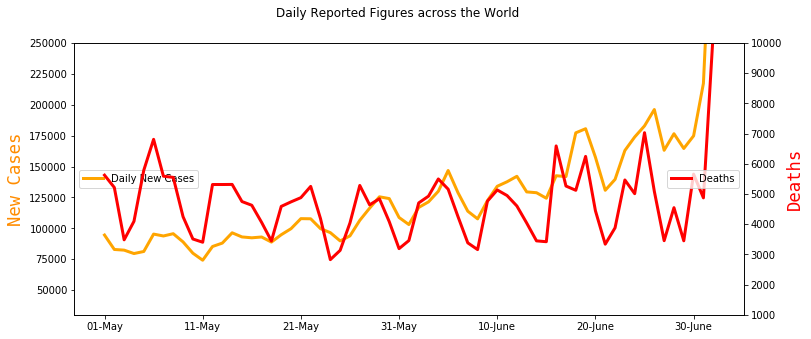

In [192]:
plt.figure(figsize=(12,5)) 
plt.suptitle("Daily Reported Figures across the World")

world_cases = daily[daily["Country,Other"] == 'World']

ax1 = plt.subplot()

ax1.plot(dates,world_cases.Cases,label="Daily New Cases",
        color="orange",linewidth=3)
ax1.set_ylabel('New Cases', color="darkorange",
              fontsize="xx-large",fontfamily="monospace")
ax1.set_ylim(30000,250000)
ax2 = ax1.twinx()


ax2.plot(dates,world_cases.Deaths,label="Deaths",
         color="red",linewidth=3)
ax2.set_ylabel('Deaths', color="red",
               fontsize="xx-large",fontfamily="monospace")

ax2.set_ylim(1000,10000)

loc = plticker.MultipleLocator(base=10.0) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc)

ax1.legend(loc=6)
ax2.legend(loc=7)

# For Trendline
#z = np.polyfit(dates,world_cases.Cases,1)
#p = np.poly1d(z)
#plt.plot(dates,p(dates),"r--")

plt.savefig("world.png")
#ax.annotate("A Simple Plot",xy=('02-05-2020',y),
#             fontsize=15,color="g",
#             xytext=(10,350),arrowprops=dict(facecolor='black'))

In [193]:
series = daily["Cases"][daily["Country,Other"] == "USA"].tail(2)

arr = series.to_numpy()

if arr[0] > arr[1]:
    print(f'-{round((1-arr[1]/arr[0])*100)}%')
else:
    print(f'+{round((arr[1]/arr[0]-1)*100)}%')

+112.0%


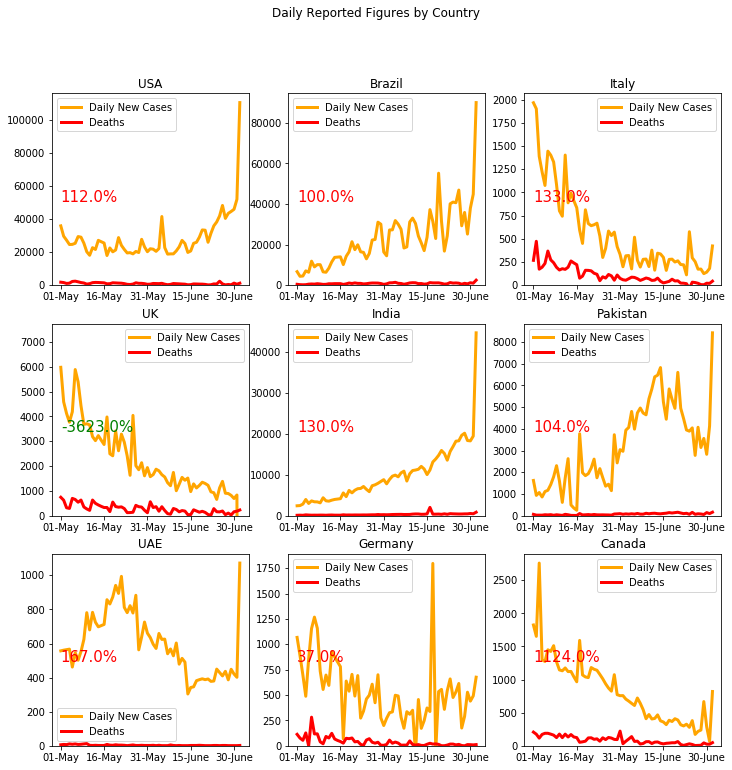

In [194]:


plt.figure(figsize=(12,12))
plt.suptitle("Daily Reported Figures by Country")

movement = None
countries =['USA','Brazil','Italy','UK','India','Pakistan',
           'UAE','Germany','Canada']



for x,c in enumerate(countries,start=331):
    ax = plt.subplot(x)
    
    
    series = daily["Cases"][daily["Country,Other"] == c].tail(2)

    arr = series.to_numpy()

    if arr[0] > arr[1]:
        movement = -1 * round((1-arr[1]/arr[0])*100)
    else:
        movement= round((arr[1]/arr[0]-1)*100)
    
    
    ax.plot(dates,daily["Cases"][daily["Country,Other"] == c],
            label="Daily New Cases",color="orange",linewidth=3)
    
    
    ax.plot(dates,daily["Deaths"][daily["Country,Other"] == c],
            label="Deaths",color="red",linewidth=3)
    
    clr = "g" if movement < 0 else "r"
    
    ax.set_ylim(bottom=0)
    min,max = ax.get_ylim()
    tick = ax.get_yticks()[-1] - ax.get_yticks()[-2]
    
    loc = plticker.MultipleLocator(base=15.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)

    #ax.set_ylabel()
    
    ax.annotate(f"{movement}%",('01-May',max//2),
            fontsize=15,color=clr,
            horizontalalignment='left', verticalalignment='top')
    
    ax.set_title(c)
    ax.legend()
    
plt.savefig("countries.png")

In [195]:
# countries = daily['Country,Other'].unique()
# good,bad=[],[]
# for c in countries:
#     series = daily[["Cases","TotalCases"]][daily["Country,Other"] == c].tail(2)

#     s1 = series["Cases"]
#     s2 = series["TotalCases"]
    
#     if arr2 > 10000:
#         if arr1[0] > arr1[1]:
#             good.append(c)
#         else:
#             bad.append(c)
# #good.to_numpy()
# #bad.numpy()


In [196]:
cs = daily["Country,Other"]
countries = cs.to_numpy()
countries

array(['World', 'USA', 'Spain', ..., 'Saint Pierre Miquelon', 'China',
       'Total:'], dtype=object)

In [197]:
movements={}
for x in countries:

    series = daily["Cases"][daily["Country,Other"] == x].tail(2)

    arr = series.to_numpy()

    if arr[0] > arr[1]:
        movement = -1 * round((1-arr[1]/arr[0])*100)
        
    else:
        movement= round((arr[1]/arr[0]-1)*100)
    
    movements[x] = movement

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [198]:
daily[daily["Country,Other"]=='India'][["Cases","Deaths"]].to_csv("Simple_Linear_Regression.csv",index=False)